In [401]:
# Model building using Artificial Neural Network
# heart failure prediction using deep learning
import tensorflow
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #used for accuracy visualization

In [402]:
data=pd.read_csv(r"C:\Users\donad\OneDrive\Desktop\Internship\3_DL\Datasets\heart_failure_clinical_records_dataset (2).csv")
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [403]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [404]:
data.duplicated().sum()

0

In [405]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dummy=['age','platelets','serum_creatinine']
for i in dummy:
    data[i]=le.fit_transform(data[i].astype(str))
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,34,0,582,0,20,1,86,17,130,1,0,4,1
1,15,0,7861,0,38,0,84,7,136,1,0,6,1
2,26,0,146,0,20,0,18,10,129,1,1,7,1
3,10,1,111,0,20,0,41,17,137,1,0,7,1
4,26,1,160,1,20,0,126,24,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,23,0,61,1,38,1,16,7,143,1,1,270,0
295,15,0,1820,0,38,0,90,9,139,0,0,271,0
296,5,0,2060,1,60,0,172,4,138,0,0,278,0
297,5,0,2413,0,38,0,9,11,140,1,1,280,0


In [406]:
x = data.iloc[:, :12].values
y = data.iloc[:,12].values

In [407]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [408]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [409]:
# Initialising the ANN
classifier = Sequential()

In [410]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(10, kernel_initializer ='uniform', activation='relu', input_dim=12))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

In [411]:
# Adding the second hidden layer
classifier.add(Dense(10, kernel_initializer ='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

In [412]:
# Adding the output layer
classifier.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [413]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [414]:
# Fitting the ANN to the Training set
classifier.fit(x_train, y_train, batch_size=100, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 10ms/step - loss: 0.6930 - accuracy: 0.6172
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6924 - accuracy: 0.6746
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6917 - accuracy: 0.6746
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6911 - accuracy: 0.6746
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6903 - accuracy: 0.6746
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6896 - accuracy: 0.6746
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6887 - accuracy: 0.6746
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6880 - accuracy: 0.6746
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6868 - accuracy: 0.6746
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6857 - accuracy: 0.6746
Epoch 11/100
3/3 [==========

In [415]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

3/3 [==============================] - 0s 5ms/step


In [416]:
y_pred

array([[False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [

In [417]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[57,  5],
       [ 9, 19]], dtype=int64)

In [418]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/90)*100))

Our accuracy is 84.44444444444444%


<Axes: >

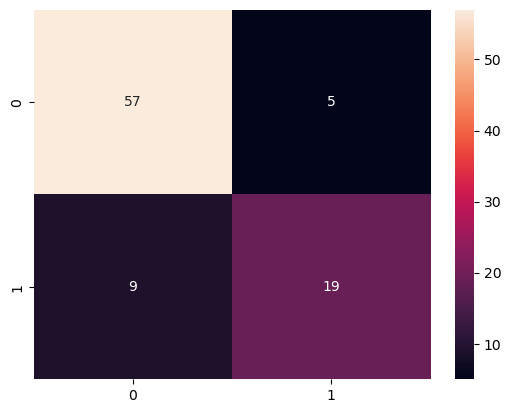

In [419]:
sns.heatmap(cm,annot=True)